In [170]:
import pandas as pd

In [171]:
teams = pd.read_csv('teams.csv')

In [172]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [173]:
teams = teams[['team','country','year','athletes','age','medals','prev_medals']]

In [174]:
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


In [175]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,medals,prev_medals
19,ALB,Albania,1992,9,25.3,0,NaN
26,ALG,Algeria,1964,7,26.0,0,NaN
39,AND,Andorra,1976,3,28.3,0,NaN
50,ANG,Angola,1980,17,17.4,0,NaN
59,ANT,Antigua and Barbuda,1976,17,23.2,0,NaN
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,0,NaN
2103,YAR,North Yemen,1984,3,27.7,0,NaN
2105,YEM,Yemen,1992,8,19.6,0,NaN
2112,YMD,South Yemen,1988,5,23.6,0,NaN


In [176]:
teams=teams.dropna()

In [177]:
teams.isnull().value_counts()

team   country  year   athletes  age    medals  prev_medals
False  False    False  False     False  False   False          2014
dtype: int64

In [178]:
teams.corr()['medals']

C:\Users\ESTHER\AppData\Local\Temp\ipykernel_6796\801081661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()['medals']


year          -0.034870
athletes       0.839909
age            0.023231
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64

In [179]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014 entries, 0 to 2143
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2014 non-null   object 
 1   country      2014 non-null   object 
 2   year         2014 non-null   int64  
 3   athletes     2014 non-null   int64  
 4   age          2014 non-null   float64
 5   medals       2014 non-null   int64  
 6   prev_medals  2014 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 125.9+ KB


In [180]:
import seaborn as sns

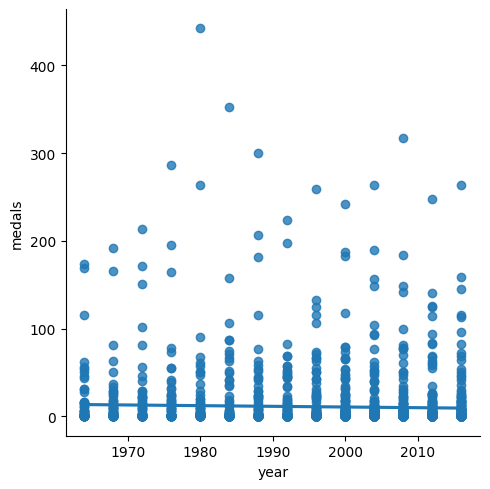

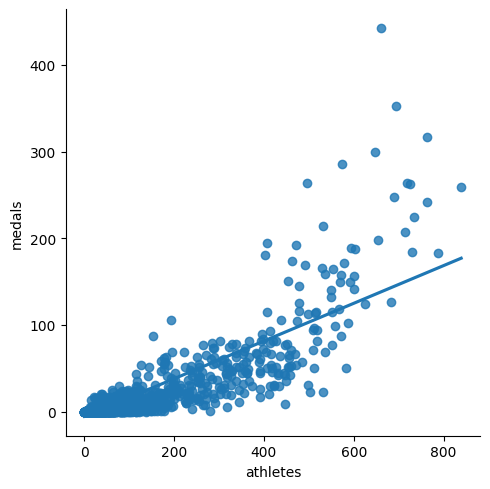

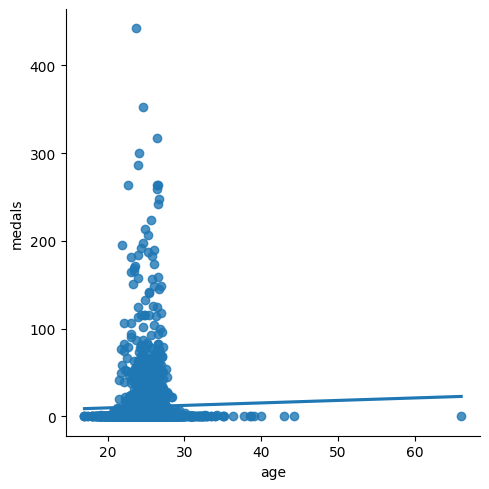

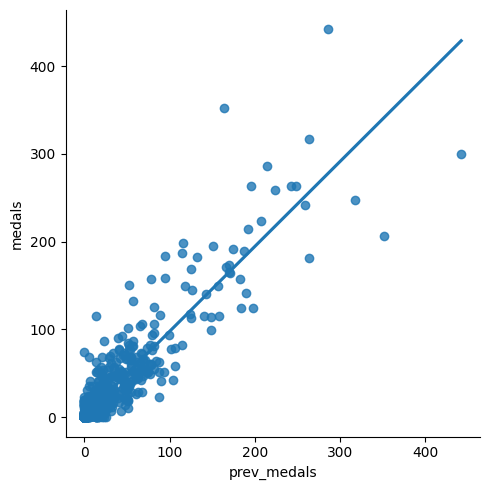

In [181]:
cols=['year','athletes','age','prev_medals']

for i in cols:
    sns.lmplot(x=i,y='medals',data=teams,ci=None)
#sns.lmplot(x='athletes',y='medals',data=teams, ci=None)

<AxesSubplot: ylabel='Frequency'>

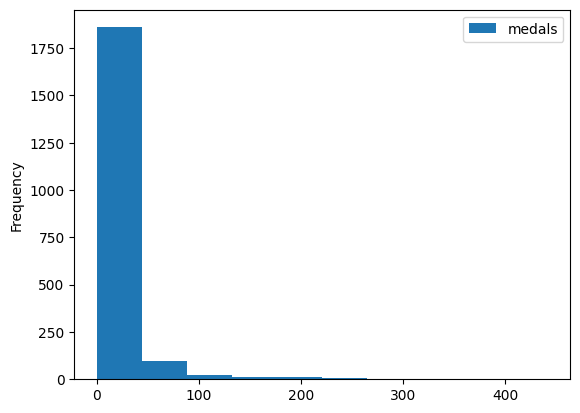

In [182]:
teams.plot.hist(y='medals')

### Modelling

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [184]:
x=['year','athletes','age','prev_medals']
y=teams['medals']

In [185]:
train_x,test_x,train_y,test_y=train_test_split(teams[x],y,test_size = 0.2, random_state=0)

In [186]:
train_x.shape

(1611, 4)

In [187]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [188]:
predictions=model.predict(test_x)

In [189]:
test=test_x

In [190]:
test['medals']=test_y
test['predictions']=predictions

In [191]:
test

,year,athletes,age,prev_medals,medals,predictions
1407,2008,7,26.7,0.0,0,-1.801142
1620,1976,112,22.9,0.0,1,6.063192
1483,2008,201,26.5,6.0,15,15.594644
1806,2016,6,21.3,0.0,0,-1.291368
1464,2012,69,27.3,22.0,17,18.916358
...,...,...,...,...,...,...
1422,2012,222,27.1,61.0,69,58.747174
2115,1972,212,24.6,29.0,18,34.593247
1770,2000,2,23.0,0.0,0,-1.546040
1317,2000,5,19.8,0.0,0,-0.939942


In [192]:
test.loc[test['predictions'] < 0] = 0
test['predictions']=test['predictions'].round()

In [193]:
test

,year,athletes,age,prev_medals,medals,predictions
1407,0,0,0.0,0.0,0,0.0
1620,1976,112,22.9,0.0,1,6.0
1483,2008,201,26.5,6.0,15,16.0
1806,0,0,0.0,0.0,0,0.0
1464,2012,69,27.3,22.0,17,19.0
...,...,...,...,...,...,...
1422,2012,222,27.1,61.0,69,59.0
2115,1972,212,24.6,29.0,18,35.0
1770,0,0,0.0,0.0,0,0.0
1317,0,0,0.0,0.0,0,0.0


In [194]:
from sklearn.metrics import mean_absolute_error

In [195]:
mean_absolute_error(test['medals'],test['predictions'])

4.133995037220844

In [196]:
test.describe()

,year,athletes,age,prev_medals,medals,predictions
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,979.553350,68.831266,12.199007,10.833747,11.158809,11.913151
std,998.021405,129.207136,12.490452,35.318447,34.404740,33.700464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1996.000000,67.500000,24.800000,4.500000,4.000000,7.000000
max,2016.000000,730.000000,29.100000,442.000000,300.000000,378.000000


In [197]:
test['errors'] = (test["medals"] - test['predictions'])